# Installations

In [ ]:
!pip install -U scikit-learn

!pip install -U pandas --quiet

!pip install -U matplotlib --quiet

# Data Leak

## Avoid data leak

In [9]:
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=10000, n_features=10, n_informative=5, n_redundant=5, random_state=42)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Train the model
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(X_train,y_train)

#Evaluate on test data
yhat = model.predict(X_test)

#Evaluate model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, yhat)
print(accuracy*100)

78.45454545454545


## Pipeline to avoid data leak

In [15]:
%reset -f 

In [16]:
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=10000, n_features=10, n_informative=5, n_redundant=5, random_state=42)

import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# define the pipeline
steps = list()
steps.append(('scaler', MinMaxScaler()))
steps.append(('model', LogisticRegression()))
pipeline = Pipeline(steps=steps)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model using cross-validation
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores)*100, np.std(scores)*100))

Accuracy: 77.743 (1.296)


# Feature Selection with Stats

## Numerical Features - Classification

### ANOVA F-Statistic. 

Feature 0: 16.527385
Feature 1: 131.325562
Feature 2: 0.042371
Feature 3: 1.415216
Feature 4: 12.778966
Feature 5: 49.209523
Feature 6: 13.377142
Feature 7: 25.126440


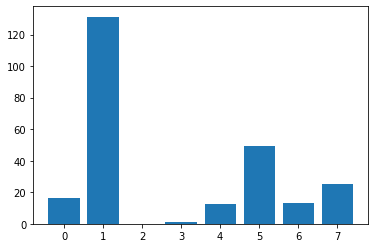

In [30]:
%reset -f 

import pandas as pd 
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/AIP-codedb/public/main/data/pima-indians-diabetes.csv",header=None)
dataset = data.values
X = dataset[:, :-1]
y = dataset[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fsAF = SelectKBest(score_func=f_classif, k=4) 

fsAF.fit(X_train, y_train)
X_train_fsAF = fsAF.transform(X_train)
X_test_fsAF = fsAF.transform(X_test)

# what are scores for the features
for i in range(len(fsAF.scores_)):
    print('Feature %d: %f' % (i, fsAF.scores_[i]))

# plot the scores
plt.bar([i for i in range(len(fsAF.scores_))], fsAF.scores_)
plt.show()

#### Full data training

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print(accuracy*100)

77.55905511811024


#### Select feature training

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fsAF, y_train)

# evaluate the model
yhat = model.predict(X_test_fsAF)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print(accuracy*100)

78.74015748031496


### Mutual Information Statistics

Feature 0: 0.009929
Feature 1: 0.100326
Feature 2: 0.009619
Feature 3: 0.000000
Feature 4: 0.017367
Feature 5: 0.080869
Feature 6: 0.006098
Feature 7: 0.047776


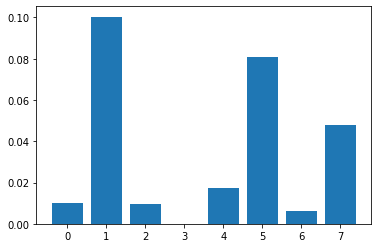

In [34]:
%reset -f 

import pandas as pd 
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/AIP-codedb/public/main/data/pima-indians-diabetes.csv",header=None)
dataset = data.values
X = dataset[:, :-1]
y = dataset[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
fsAF = SelectKBest(score_func=mutual_info_classif, k=4) 

fsAF.fit(X_train, y_train)
X_train_fsAF = fsAF.transform(X_train)
X_test_fsAF = fsAF.transform(X_test)

# what are scores for the features
for i in range(len(fsAF.scores_)):
    print('Feature %d: %f' % (i, fsAF.scores_[i]))

# plot the scores
plt.bar([i for i in range(len(fsAF.scores_))], fsAF.scores_)
plt.show()

#### Full data training

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print(accuracy*100)

77.55905511811024


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fsAF, y_train)

# evaluate the model
yhat = model.predict(X_test_fsAF)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print(accuracy*100)

77.55905511811024


## Categorical Features - Classification

### Chi-Squared Statistic

Feature 0: 0.472553
Feature 1: 0.029193
Feature 2: 2.137658
Feature 3: 29.381059
Feature 4: 8.222601
Feature 5: 8.100183
Feature 6: 1.273822
Feature 7: 0.950682
Feature 8: 3.699989


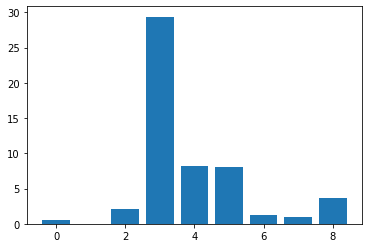

In [2]:
%reset -f 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

data = pd.read_csv("https://raw.githubusercontent.com/AIP-codedb/public/main/data/breast-cancer.csv",header=None)
dataset = data.values
X = dataset[:, :-1]
y = dataset[:,-1]

# format all fields as string
X = X.astype(str)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# prepare input data
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe.fit(X_train)
X_train_enc = oe.transform(X_train)
X_test_enc = oe.transform(X_test)

from sklearn.preprocessing import LabelEncoder
# prepare output data
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

# feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
fschi2 = SelectKBest(score_func=chi2, k=6)

fschi2.fit(X_train_enc, y_train_enc)
X_train_fschi2 = fschi2.transform(X_train_enc)
X_test_fschi2 = fschi2.transform(X_test_enc)

# what are scores for the features
for i in range(len(fschi2.scores_)):
    print('Feature %d: %f' % (i, fschi2.scores_[i]))

# plot the scores
plt.bar([i for i in range(len(fschi2.scores_))], fschi2.scores_)
plt.show()

#### Full data Training

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)

# evaluate the model
yhat = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print(accuracy*100)

75.78947368421053


#### Select Feature Training

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fschi2, y_train_enc)

# evaluate the model
yhat = model.predict(X_test_fschi2)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print(accuracy*100)

74.73684210526315


### Mutual Information Statistic

Feature 0: 0.025391
Feature 1: 0.000913
Feature 2: 0.043104
Feature 3: 0.027885
Feature 4: 0.023301
Feature 5: 0.049270
Feature 6: 0.000000
Feature 7: 0.018315
Feature 8: 0.000000


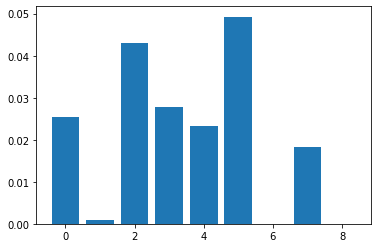

In [5]:
%reset -f 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

data = pd.read_csv("https://raw.githubusercontent.com/AIP-codedb/public/main/data/breast-cancer.csv",header=None)
dataset = data.values
X = dataset[:, :-1]
y = dataset[:,-1]

# format all fields as string
X = X.astype(str)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# prepare input data
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe.fit(X_train)
X_train_enc = oe.transform(X_train)
X_test_enc = oe.transform(X_test)

from sklearn.preprocessing import LabelEncoder
# prepare output data
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

# feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
fschi2 = SelectKBest(score_func=mutual_info_classif, k=6)

fschi2.fit(X_train_enc, y_train_enc)
X_train_fschi2 = fschi2.transform(X_train_enc)
X_test_fschi2 = fschi2.transform(X_test_enc)

# what are scores for the features
for i in range(len(fschi2.scores_)):
    print('Feature %d: %f' % (i, fschi2.scores_[i]))

# plot the scores
plt.bar([i for i in range(len(fschi2.scores_))], fschi2.scores_)
plt.show()

#### Full Data Training

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)

# evaluate the model
yhat = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print(accuracy*100)

75.78947368421053


#### Select Feature Training

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fschi2, y_train_enc)

# evaluate the model
yhat = model.predict(X_test_fschi2)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print(accuracy*100)

73.68421052631578


## Numerical Feature - Regression

### Correlation Statistics

In [8]:
%reset -f

# load the dataset 
from sklearn.datasets import make_regression 
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

# split into train and test sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs_corr = SelectKBest(score_func=f_regression, k=70)
fs_corr.fit(X_train, y_train)
X_train_fs_corr = fs_corr.transform(X_train)
X_test_fs_corr = fs_corr.transform(X_test)

#### Full Data Training

In [9]:
# fit the model 
from sklearn.linear_model import LinearRegression 
model = LinearRegression() 
model.fit(X_train, y_train) 

# evaluate the model 
from sklearn.metrics import mean_absolute_error
yhat = model.predict(X_test) 

# evaluate predictions 
mae = mean_absolute_error(y_test, yhat) 
print(mae)

0.08569191074141677


#### Select Feature Training

In [10]:
# fit the model 
model = LinearRegression() 
model.fit(X_train_fs_corr, y_train) 
# evaluate the model 

yhat = model.predict(X_test_fs_corr) 
# evaluate predictions 
mae = mean_absolute_error(y_test, yhat) 
print(mae)

0.08245530329045198


### Mutual Information Statistics

In [11]:
%reset -f

# load the dataset 
from sklearn.datasets import make_regression 
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

# split into train and test sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

fs_corr = SelectKBest(score_func=mutual_info_regression, k=70)
fs_corr.fit(X_train, y_train)
X_train_fs_corr = fs_corr.transform(X_train)
X_test_fs_corr = fs_corr.transform(X_test)

#### Full Data Training

In [12]:
# fit the model 
from sklearn.linear_model import LinearRegression 
model = LinearRegression() 
model.fit(X_train, y_train) 

# evaluate the model 
from sklearn.metrics import mean_absolute_error
yhat = model.predict(X_test) 

# evaluate predictions 
mae = mean_absolute_error(y_test, yhat) 
print(mae)

0.08569191074141677


#### Select Feature Training

In [13]:
# fit the model 
model = LinearRegression() 
model.fit(X_train_fs_corr, y_train) 
# evaluate the model 

yhat = model.predict(X_test_fs_corr) 
# evaluate predictions 
mae = mean_absolute_error(y_test, yhat) 
print(mae)

0.08256189653227453


# Feature Selection with RFE

### RFE

In [14]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=10000, n_features=10, n_informative=5, n_redundant=5, random_state=42)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
# scale the test dataset : only transform to avoid data leak
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
pred_train=clf.predict(X_train)
print('accuracy_score on training data: ',accuracy_score(y_train,pred_train))

pred_test=clf.predict(X_test)
print('accuracy_score on test data: ',accuracy_score(y_test,pred_test))

# define RFE
from sklearn.feature_selection import RFE
clf = RFE(estimator=LogisticRegression(), n_features_to_select=5)
# fit RFE
clf.fit(X_train,y_train)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected=%s, Rank: %d' % (i, clf.support_[i], clf.ranking_[i]))

from sklearn.metrics import accuracy_score
pred_train=clf.predict(X_train)
print('accuracy_score on training data: ',accuracy_score(y_train,pred_train))

pred_test=clf.predict(X_test)
print('accuracy_score on test data: ',accuracy_score(y_test,pred_test))

accuracy_score on training data:  0.7774666666666666
accuracy_score on test data:  0.776
Column: 0, Selected=True, Rank: 1
Column: 1, Selected=True, Rank: 1
Column: 2, Selected=False, Rank: 6
Column: 3, Selected=False, Rank: 2
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=False, Rank: 4
Column: 6, Selected=False, Rank: 5
Column: 7, Selected=True, Rank: 1
Column: 8, Selected=True, Rank: 1
Column: 9, Selected=False, Rank: 3
accuracy_score on training data:  0.7774666666666666
accuracy_score on test data:  0.7752


### Automatic RFE

In [15]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFECV
# define dataset
X, y = make_classification(n_samples=10000, n_features=10, n_informative=5, n_redundant=5, random_state=42)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
# scale the test dataset : only transform to avoid data leak
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
pred_train=clf.predict(X_train)
print('accuracy_score on training data: ',accuracy_score(y_train,pred_train))

pred_test=clf.predict(X_test)
print('accuracy_score on test data: ',accuracy_score(y_test,pred_test))

# define RFE
from sklearn.feature_selection import RFECV
clf = RFECV(estimator=LogisticRegression())
# fit RFE
clf.fit(X_train,y_train)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected=%s, Rank: %d' % (i, clf.support_[i], clf.ranking_[i]))

from sklearn.metrics import accuracy_score
pred_train=clf.predict(X_train)
print('accuracy_score on training data: ',accuracy_score(y_train,pred_train))

pred_test=clf.predict(X_test)
print('accuracy_score on test data: ',accuracy_score(y_test,pred_test))

accuracy_score on training data:  0.7774666666666666
accuracy_score on test data:  0.776
Column: 0, Selected=True, Rank: 1
Column: 1, Selected=True, Rank: 1
Column: 2, Selected=False, Rank: 4
Column: 3, Selected=True, Rank: 1
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=False, Rank: 2
Column: 6, Selected=False, Rank: 3
Column: 7, Selected=True, Rank: 1
Column: 8, Selected=True, Rank: 1
Column: 9, Selected=True, Rank: 1
accuracy_score on training data:  0.7788
accuracy_score on test data:  0.774
